In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statannot import add_stat_annotation


In [2]:
tb = np.load("theoretical_best.npy", allow_pickle=True).item()
cv = np.load("cv_results.npy", allow_pickle=True).item()

In [3]:
cv.keys()

dict_keys(['0.1-0.9', '0.25-0.75', '0.5-0.5', '0.75-0.25', '0.9-0.1'])

In [4]:
df = pd.read_csv("CV_50-fold_results.tsv", index_col=0, sep='\t')

values = []
labels = []
for fold in df.index.values:
    values += [df.loc[fold].values]
    labels += [len(df.loc[fold].values)*[fold]]

values = np.hstack(values)
labels = np.hstack(labels)

final = np.vstack([values, labels])
df = pd.DataFrame(final.T, columns = ['rmse', 'split'])

df['split'] = df['split'].astype(str)
df['rmse'] = df['rmse'].astype(float).apply(np.log2)

In [27]:
tb_rmse = np.log2(tb["pred_rmse"])

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

0.1-0.9 v.s. 0.25-0.75: t-test independent samples, P_val=4.034e-10 stat=6.952e+00
0.25-0.75 v.s. 0.5-0.5: t-test independent samples, P_val=1.842e-07 stat=5.614e+00
0.5-0.5 v.s. 0.75-0.25: t-test independent samples, P_val=4.099e-01 stat=8.276e-01
0.75-0.25 v.s. 0.9-0.1: t-test independent samples, P_val=4.991e-01 stat=6.785e-01


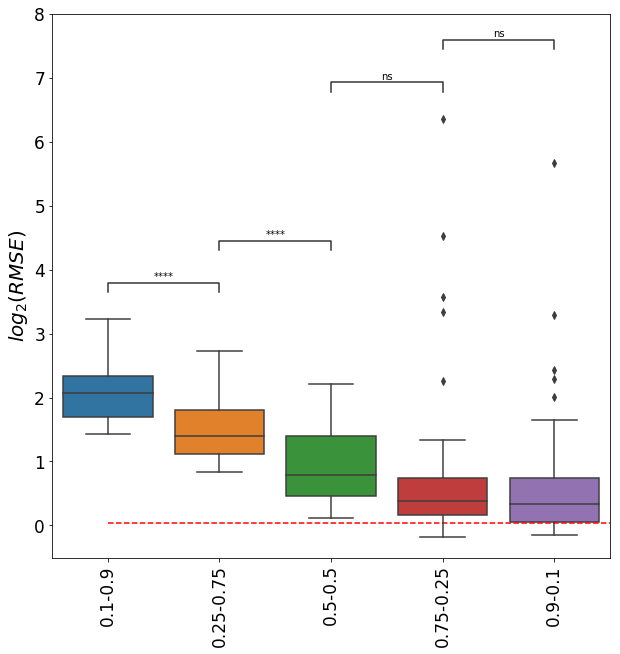

In [43]:
plt.figure(figsize=(10,10))
all_splits = []
split_labels = []

for split in cv.keys():
    split_labels += [split]
    all_splits += [cv[split]["rmse"]]

ax = sns.boxplot(x="split", y="rmse", data=df)
test_results = add_stat_annotation(ax, data=df, x="split", y="rmse", order=split_labels,
                                   box_pairs=[('0.1-0.9', '0.25-0.75'),
                                              ('0.25-0.75', '0.5-0.5'), ('0.5-0.5', '0.75-0.25'),
                                             ('0.75-0.25','0.9-0.1')],
                                   test='t-test_ind', text_format='star', loc='inside', verbose=2)
plt.hlines(tb_rmse, 0,6, linestyles='dashed', color='r')

plt.ylabel(r"$log_2(RMSE)$", fontsize=20)
plt.xlabel("")
plt.xticks(np.arange(0,len(all_splits)), split_labels, fontsize=17, rotation=90)
plt.yticks(fontsize=17)

plt.savefig("../plots/50-fold_results.png", dpi=600)
plt.show()

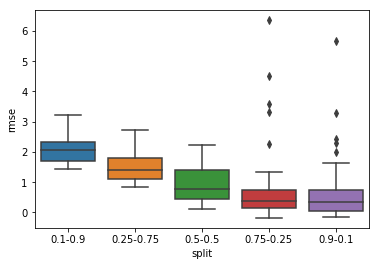